##  Chapter 7  Signal handling and time series

In [3]:
import statsmodels.api as sm


In [4]:
import matplotlib.pyplot as plt

In [5]:
#from pandas.stats.moments import rolling_mean

In [6]:
import numpy as np

In [7]:
data_loader = sm.datasets.sunspots.load_pandas()

In [8]:
df = data_loader.data

In [9]:
df

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [10]:
year_range = df['YEAR'].values

In [11]:
year_range

array([1700., 1701., 1702., 1703., 1704., 1705., 1706., 1707., 1708.,
       1709., 1710., 1711., 1712., 1713., 1714., 1715., 1716., 1717.,
       1718., 1719., 1720., 1721., 1722., 1723., 1724., 1725., 1726.,
       1727., 1728., 1729., 1730., 1731., 1732., 1733., 1734., 1735.,
       1736., 1737., 1738., 1739., 1740., 1741., 1742., 1743., 1744.,
       1745., 1746., 1747., 1748., 1749., 1750., 1751., 1752., 1753.,
       1754., 1755., 1756., 1757., 1758., 1759., 1760., 1761., 1762.,
       1763., 1764., 1765., 1766., 1767., 1768., 1769., 1770., 1771.,
       1772., 1773., 1774., 1775., 1776., 1777., 1778., 1779., 1780.,
       1781., 1782., 1783., 1784., 1785., 1786., 1787., 1788., 1789.,
       1790., 1791., 1792., 1793., 1794., 1795., 1796., 1797., 1798.,
       1799., 1800., 1801., 1802., 1803., 1804., 1805., 1806., 1807.,
       1808., 1809., 1810., 1811., 1812., 1813., 1814., 1815., 1816.,
       1817., 1818., 1819., 1820., 1821., 1822., 1823., 1824., 1825.,
       1826., 1827.,

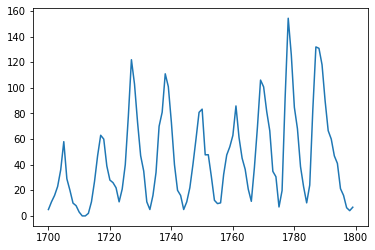

In [168]:
plt.plot(year_range[:100],df['SUNACTIVITY'].values[:100],label='Original')

#### Rolling mean 

In [27]:
rolling_windows11 = df.rolling(11, min_periods=1)
rolling_windows22 = df.rolling(22, min_periods=1)

In [28]:
rolling_windows11

Rolling [window=11,min_periods=1,center=False,axis=0]

In [32]:
rolling_mean11 = rolling_windows11.mean()
rolling_mean22 = rolling_windows22.mean()

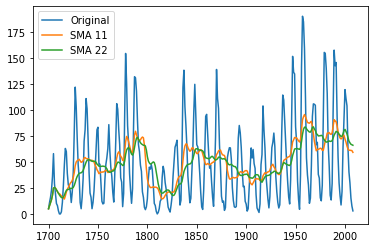

In [33]:
plt.plot(year_range,df['SUNACTIVITY'].values,label='Original')
plt.plot(year_range,rolling_mean11['SUNACTIVITY'].values,label='SMA 11')
plt.plot(year_range,rolling_mean22['SUNACTIVITY'].values,label='SMA 22')
plt.legend()
plt.show()

In [34]:
rolling_mean11

,YEAR,SUNACTIVITY
0,1700.0,5.000000
1,1700.5,8.000000
2,1701.0,10.666667
3,1701.5,13.750000
4,1702.0,18.200000
...,...,...
304,1999.0,61.254545
305,2000.0,61.245455
306,2001.0,61.036364
307,2002.0,60.936364


### Cointegration 

In [36]:
import statsmodels.tsa.stattools as ts

In [38]:
def calc_adf(x,y):
    result = sm.OLS(x,y).fit()
    return ts.adfuller(result.resid)

In [39]:
data_loader # loaded sunspots sample data

<class 'statsmodels.datasets.utils.Dataset'>

In [40]:
data = data_loader.data.values

In [42]:
N = len(data)

In [44]:
t = np.linspace(-2*np.pi,2*np.pi,N)

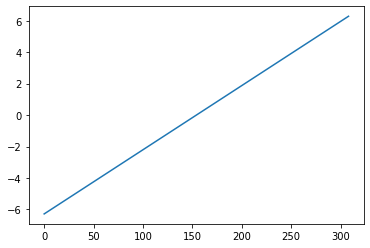

In [46]:
plt.plot(t)

In [47]:
sine = np.sin(np.sin(t))

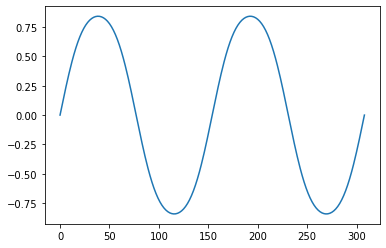

In [48]:
plt.plot(sine)

In [52]:
calc_adf(sine,sine)

(5.098349840844281e-16,
 0.958532086060056,
 0,
 308,
 {'1%': -3.45176116018037,
  '5%': -2.870970093607691,
  '10%': -2.571794416006072},
 -21598.896016765088)

In [69]:
noise = np.random.normal(0,0.01,N)

In [70]:
calc_adf(sine, sine +noise)

(-17.656875978350232,
 3.697777489313294e-30,
 0,
 308,
 {'1%': -3.45176116018037,
  '5%': -2.870970093607691,
  '10%': -2.571794416006072},
 -1866.937647104227)

    (-18.342270304495717,
     2.2448535173292587e-30,    # P value , 0.95 means refuse = No. almost equal
     0,
     308,
     {'1%': -3.45176116018037,
      '5%': -2.870970093607691,
      '10%': -2.571794416006072},
     -1869.9180307672254

In [73]:
adf = calc_adf(sine,data)

In [75]:
adf[1] # P value

3.4210811915549028e-09

### Correlation

In [52]:
data1 = data_loader.data['SUNACTIVITY'].values
years = data_loader.data['YEAR'].values
data2 = data1.tolist()
data1

array([  5. ,  11. ,  16. ,  23. ,  36. ,  58. ,  29. ,  20. ,  10. ,
         8. ,   3. ,   0. ,   0. ,   2. ,  11. ,  27. ,  47. ,  63. ,
        60. ,  39. ,  28. ,  26. ,  22. ,  11. ,  21. ,  40. ,  78. ,
       122. , 103. ,  73. ,  47. ,  35. ,  11. ,   5. ,  16. ,  34. ,
        70. ,  81. , 111. , 101. ,  73. ,  40. ,  20. ,  16. ,   5. ,
        11. ,  22. ,  40. ,  60. ,  80.9,  83.4,  47.7,  47.8,  30.7,
        12.2,   9.6,  10.2,  32.4,  47.6,  54. ,  62.9,  85.9,  61.2,
        45.1,  36.4,  20.9,  11.4,  37.8,  69.8, 106.1, 100.8,  81.6,
        66.5,  34.8,  30.6,   7. ,  19.8,  92.5, 154.4, 125.9,  84.8,
        68.1,  38.5,  22.8,  10.2,  24.1,  82.9, 132. , 130.9, 118.1,
        89.9,  66.6,  60. ,  46.9,  41. ,  21.3,  16. ,   6.4,   4.1,
         6.8,  14.5,  34. ,  45. ,  43.1,  47.5,  42.2,  28.1,  10.1,
         8.1,   2.5,   0. ,   1.4,   5. ,  12.2,  13.9,  35.4,  45.8,
        41.1,  30.1,  23.9,  15.6,   6.6,   4. ,   1.8,   8.5,  16.6,
        36.3,  49.6,

In [139]:
y = data1- np.mean(data1)
y

array([-44.75210356, -38.75210356, -33.75210356, -26.75210356,
       -13.75210356,   8.24789644, -20.75210356, -29.75210356,
       -39.75210356, -41.75210356, -46.75210356, -49.75210356,
       -49.75210356, -47.75210356, -38.75210356, -22.75210356,
        -2.75210356,  13.24789644,  10.24789644, -10.75210356,
       -21.75210356, -23.75210356, -27.75210356, -38.75210356,
       -28.75210356,  -9.75210356,  28.24789644,  72.24789644,
        53.24789644,  23.24789644,  -2.75210356, -14.75210356,
       -38.75210356, -44.75210356, -33.75210356, -15.75210356,
        20.24789644,  31.24789644,  61.24789644,  51.24789644,
        23.24789644,  -9.75210356, -29.75210356, -33.75210356,
       -44.75210356, -38.75210356, -27.75210356,  -9.75210356,
        10.24789644,  31.14789644,  33.64789644,  -2.05210356,
        -1.95210356, -19.05210356, -37.55210356, -40.15210356,
       -39.55210356, -17.35210356,  -2.15210356,   4.24789644,
        13.14789644,  36.14789644,  11.44789644,  -4.65

In [140]:
norm = np.sum(y **2)

In [141]:
norm

504015.0311326861

In [142]:
correlated = np.correlate(y, y, 'full')/norm
correlated


array([ 4.16005488e-03,  7.35392370e-03,  9.45407174e-03,  9.74446137e-03,
        8.19929138e-03,  3.03682789e-03, -2.02345366e-03, -5.56254208e-03,
       -7.74343103e-03, -6.67682848e-03, -1.68619311e-03,  6.94073528e-03,
        1.29711184e-02,  1.49240478e-02,  1.07412574e-02,  1.44431277e-03,
       -1.31542606e-02, -2.93591190e-02, -3.96967162e-02, -4.46102438e-02,
       -3.83095346e-02, -2.20348111e-02, -3.87930625e-03,  9.52294487e-03,
        1.31735425e-02,  1.76951271e-03, -2.30399876e-02, -5.22734018e-02,
       -7.53268215e-02, -8.68155833e-02, -8.02140871e-02, -5.69698094e-02,
       -2.47842174e-02,  8.47600833e-03,  2.94186190e-02,  2.96813500e-02,
        5.74675551e-03, -2.85378146e-02, -7.13593679e-02, -1.01116095e-01,
       -1.09693973e-01, -9.17985931e-02, -5.19359310e-02,  3.75324419e-03,
        5.70723680e-02,  8.51789007e-02,  8.01257706e-02,  3.66237927e-02,
       -2.90453116e-02, -9.18693265e-02, -1.30282749e-01, -1.35417226e-01,
       -1.07006152e-01, -

In [152]:
res = correlated[int(len(correlated)/2):]
res

array([ 1.00000000e+00,  8.20201294e-01,  4.51268492e-01,  3.95765516e-02,
       -2.75791961e-01, -4.25239431e-01, -3.76595090e-01, -1.57373913e-01,
        1.58202536e-01,  4.73097531e-01,  6.58980016e-01,  6.50290820e-01,
        4.56662544e-01,  1.61793295e-01, -1.22051049e-01, -3.16180797e-01,
       -3.74711254e-01, -3.06057527e-01, -1.34806895e-01,  9.15872741e-02,
        2.97563198e-01,  4.20707398e-01,  4.11839537e-01,  2.70207576e-01,
        4.49620793e-02, -1.74287148e-01, -3.30450264e-01, -3.72878341e-01,
       -2.85550608e-01, -1.17944138e-01,  8.29323086e-02,  2.48975068e-01,
        3.27521009e-01,  2.83359187e-01,  1.37527199e-01, -5.52638579e-02,
       -2.29732048e-01, -3.13388789e-01, -2.93556843e-01, -1.78972847e-01,
       -1.76903797e-02,  1.34857709e-01,  2.29690237e-01,  2.27370880e-01,
        1.44227503e-01,  1.36802861e-02, -1.11639935e-01, -1.84603763e-01,
       -2.01497207e-01, -1.56435206e-01, -7.08258985e-02,  2.70533895e-02,
        9.20744535e-02,  

In [163]:
np.argsort(res)[-5:]  # 2nd max value means the correlate period. in this case 10 years is the correlated peroid 

array([ 9, 11, 10,  1,  0])

Text(0, 0.5, 'Autocorrelation')

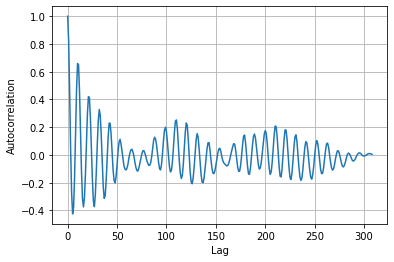

In [164]:
plt.plot(res)
plt.grid(True)
plt.xlabel("Lag")
plt.ylabel('Autocorrelation')

### Coefficient

    Try to use LSTM to predict 

### Fourier Transform *****

    Joseph Fourier , time series tranform to frequence series , dynamic world change to still .
    For Data analytics or machine learning , Fourier transform use to normal training data , 
    transform a mess data to a regular time series data sequence ,ususally, the true data is sine , data can be regulated.
     Lab can be produced , a sine with noise , use Fourier transform to remove the noise.
     FFT Fast Fourier Tansform

In [1]:
from scipy.fftpack import rfft

In [2]:
from scipy.fftpack import fftshift

In [17]:
t= np.linspace(-2 * np.pi, 2* np.pi,len(data1))

In [18]:
t


array([-6.28318531, -6.2423854 , -6.2015855 , -6.16078559, -6.11998569,
       -6.07918578, -6.03838588, -5.99758598, -5.95678607, -5.91598617,
       -5.87518626, -5.83438636, -5.79358645, -5.75278655, -5.71198664,
       -5.67118674, -5.63038683, -5.58958693, -5.54878702, -5.50798712,
       -5.46718722, -5.42638731, -5.38558741, -5.3447875 , -5.3039876 ,
       -5.26318769, -5.22238779, -5.18158788, -5.14078798, -5.09998807,
       -5.05918817, -5.01838826, -4.97758836, -4.93678846, -4.89598855,
       -4.85518865, -4.81438874, -4.77358884, -4.73278893, -4.69198903,
       -4.65118912, -4.61038922, -4.56958931, -4.52878941, -4.48798951,
       -4.4471896 , -4.4063897 , -4.36558979, -4.32478989, -4.28398998,
       -4.24319008, -4.20239017, -4.16159027, -4.12079036, -4.07999046,
       -4.03919055, -3.99839065, -3.95759075, -3.91679084, -3.87599094,
       -3.83519103, -3.79439113, -3.75359122, -3.71279132, -3.67199141,
       -3.63119151, -3.5903916 , -3.5495917 , -3.50879179, -3.46

In [19]:
mid = np.ptp(data1)/2

In [20]:
mid


95.1

In [21]:
sine = mid + mid * np.sin(np.sin(t))

In [22]:
sine_fft = np.abs(fftshift(rfft(sine)))

In [27]:
print("Index of max sine FFT", np.argsort(sine_fft)[-10:])

Index of max sine FFT [164 165 168 162 156 160 157 166 158 154]


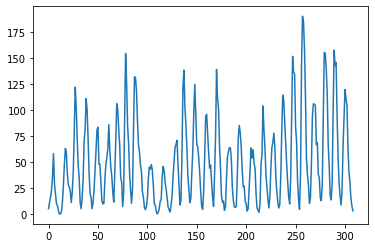

In [24]:
plt.plot(data1)

In [26]:
np.argsort(data1)

array([110,  12,  11, 213, 111, 123,  13, 109, 201, 308,  10, 178, 212,
       122,  98, 156, 254, 112, 202,  44,  33,   0, 211, 233, 223, 179,
       189,  97, 121, 155,  99, 188,  75, 190, 167, 307,   9, 108, 124,
       133, 296, 234, 200,  55, 244, 214,   8, 107,  84, 264,  56, 143,
        45,  14,   1,  23,  32, 232, 176,  66, 199, 113,  54, 177, 276,
       187, 134, 286, 253, 114, 222, 100, 144, 265, 306, 275, 120,  43,
        96,  34,   2, 166, 243, 125, 224, 175, 295, 285, 210,  76,  42,
         7, 154,  65,  24, 231,  95, 297,  22,  46, 157,  83,   3, 119,
        85, 142, 203, 186,  21, 221, 197, 198,  15, 277, 132, 263,  20,
       106,   6, 287, 305, 294, 118, 165,  74, 242,  53, 252, 180,  57,
       245, 101,  35, 274,  73,  31, 115, 191, 230,   4, 235, 126,  64,
       141, 168, 220, 262,  67, 255, 273,  82, 153,  19,  47,  41,  25,
       145, 304,  94, 117, 196, 204, 105, 103, 209, 163, 225, 174, 102,
        63, 116, 284,  93,  30, 164, 266,  16, 215, 104, 241,  5

In [32]:
sine_fft[165]

33.049143864314445

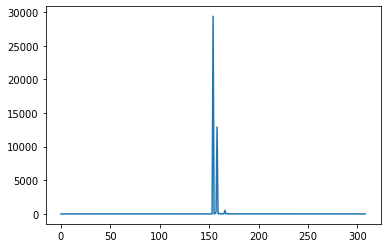

In [29]:
plt.plot(sine_fft)

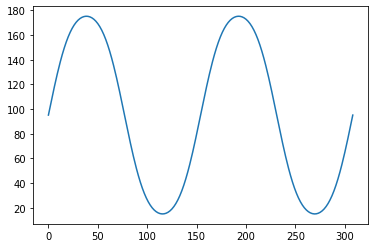

In [30]:
plt.plot(sine)

In [33]:
sunspot_fft = np.abs(fftshift(rfft(data1)))

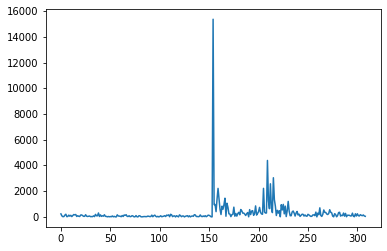

In [34]:
plt.plot(sunspot_fft)

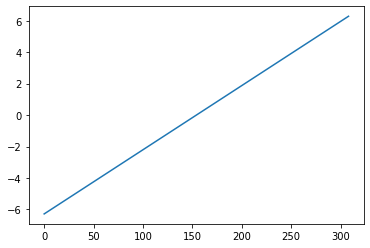

In [35]:
plt.plot(t)

### Spectrum FFT

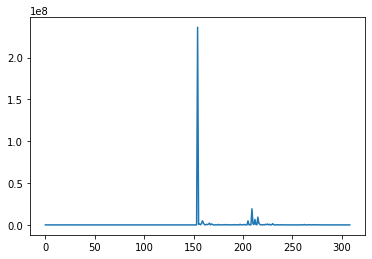

In [38]:
plt.plot(sunspot_fft**2,label='Power Spectrum')

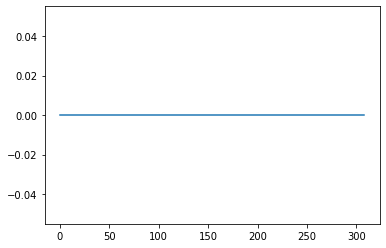

In [43]:
plt.plot(np.angle(sunspot_fft),label='Phase Spectrum')

In [46]:
from scipy.signal import medfilt

In [47]:
from scipy.signal import wiener

In [48]:
from scipy.signal import detrend

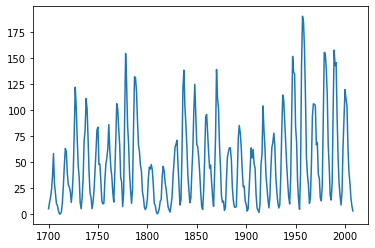

In [53]:
plt.plot(years,data1)

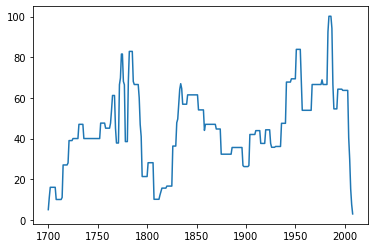

In [68]:
plt.plot(years,medfilt(data1,11))

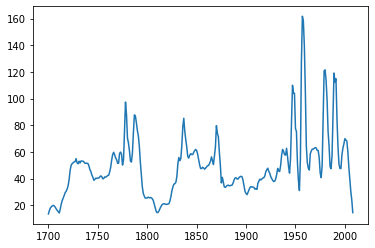

In [77]:
plt.plot(years,wiener(data1,11))

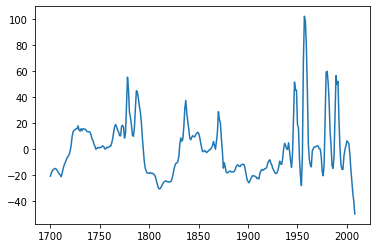

In [83]:
plt.plot(years,detrend(wiener(data1,11)))